# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Hugo Fernandez Amaro  <br>
Url: https://github.com/Hfa96/03MIAR_Algoritmos_de_Optimizacion/tree/main/Seminario <br>
Problema:
>2. Organizar los horarios de partidos de La Liga<br>


(*) La respuesta es obligatoria





                                        

## Enunciado 

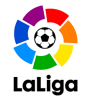

- En primer lugar se clasifican los equipos en tres categorías según el numero de seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la
categoría A, 11 equipos de categoría B y 6 equipos de categoría C.

- Se conoce estadísticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

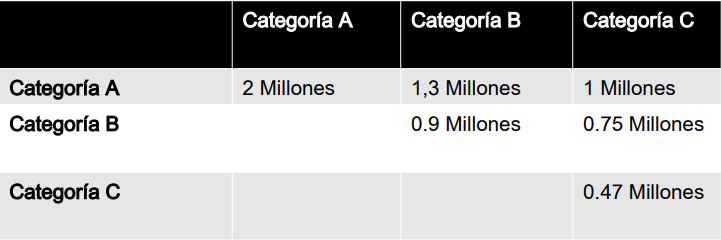

- Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla

- Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes

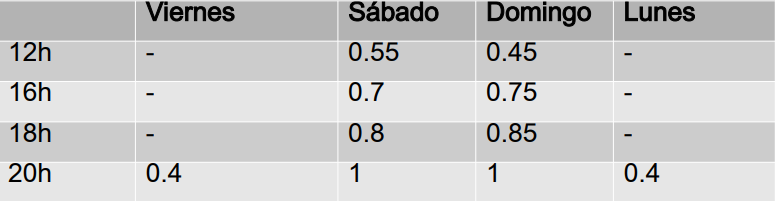


- Es posible la coincidencia de horarios pero en este
caso la audiencia de cada partido se verá afectada y
se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de
coincidencias:

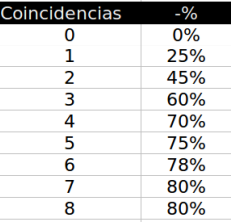



# 1. (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>

Si no tenemos en cuenta las restricciones como el orden importa y se permite la repetición, es decir, se puede poner más de un partido el mismo día, se trata de una variación con repetición

VR = 10<sup>10</sup>= 10.000.000.000

#2. ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

En cambio si tenemos en cuenta todas las restricciones, es decir, obligatoriamente tenemos que tener un partido el viernes y otro el lunes.

debemos restar al total calculado anteriormente las combinaciones sin el viernes y sin el lunes correspondientes a 2*9<sup>10</sup>, sin embargo esto no es del todo cierto ya que estarias restando 2 veces elementos que no tiene ni viernes ni lunes, por lo que compensamos con la suma de las combinaciones posibles con las 8 elecciones restantes para cada posición 8<sup>10</sup>

Obtenemos: 10<sup>10</sup> - 2*9<sup>10</sup> + 8<sup>10</sup> = 4.100.173.022

considerablemente menor pero sigue siendo un numero muy elevado


# Modelo para el espacio de soluciones<br>
#3. (*) ¿Cuál es la estructura de datos que mejor se adapta al problema? Arguméntalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguméntalo)


En el caso del problema 2, la estructura de datos que mejor se adapta al problema son los diccionarios, por la ventaja que tienen al usar el método .items() pudiendo acceder de manera simultanea a la clave y a los valores, además de su ventaja en la claridad al tener etiquetado cada valor con su clave correspondiente, en este caso la clave correspondería al partido y el valor a la visualización correspondiente.

Se puede observar tanto en el planteamiento del problema como a lo largo del código como recurro a los diccionarios para la resolución del problema.

#4. Según el modelo para el espacio de soluciones<br>
#(*)¿Cuál es la función objetivo?

En un algoritmo de optimización, la función objetivo es una función matemática que describe la medida de la calidad de una solución. El objetivo de un algoritmo de optimización es encontrar la mejor solución posible para un problema, y la función objetivo proporciona una forma de evaluar la calidad de cualquier solución propuesta.

La función objetivo toma como entrada una o varias variables de decisión que describen la solución propuesta, y devuelve un valor que representa la calidad de la solución. En general, se busca maximizar o minimizar la función objetivo, dependiendo del problema.

en este problema en concreto se pretende obtener el número máximo de visualizaciones en una jornada determinada

#(*)¿Es un problema de maximización o minimización?

Es un problema de maximización ya que lo que se pretende es conseguir la combinación de horarios que de la **maxima** cantidad de espectadores posibles en esa jornada de la liga, para este problema en concreto contabamos con 2 limitaciones, siempre teniamos que fijar un partido el viernes y el lunes.

#5. Diseña un algoritmo para resolver el problema por fuerza bruta

Como hemos visto antes, por la gran cantidad de posibilidades el algoritmo no se puede ejecutar, da error de memoria, a continuación muestro las funciones que serían necesarias para obtener un resultado por fuerza bruta

In [7]:
from random import *
import math
import numpy as np
import itertools
import re

In [ ]:
franjasHorarias = {'V20':0.4 , 'S12':0.55 ,'S16':0.7 ,'S18':0.8 , 'S20':1 , 'D12 ':0.45 , 'D16':0.75 , 'D18':0.85 , 'D20':1 , 'L20':0.4 }
partidos = [
    ["Celta", "RealMadrid"],
    ["Valencia", "RealSociedad"],
    ["Mallorca", "Eibar"],
    ["Athletic", "Barcelona"],
    ["Leganés", "Osasuna"],
    ["Villareal", "Granada"],
    ["Alavés", "Levante"],
    ["Espanyol", "Sevilla"],
    ["Betis", "Valladolid"],
    ["Atlético", "Getafe"]]

category_teams = {
    "A-category": ["RealMadrid", "RealSociedad", "Barcelona"],
    "B-category": [
        "Celta", "Valencia", "Athletic", "Villareal", "Alavés",
        "Levante", "Espanyol", "Sevilla", "Betis", "Atlético", "Getafe"],
    "C-category": ["Mallorca", "Eibar", "Leganés", "Osasuna", "Granada", "Valladolid"]}

In [2]:
# Generar todas las combinaciones posibles con repetición de horarios asegurando partido el viernes y el lunes
def comb_horarios(partidos,franjasHorarias):
  combinaciones = list(itertools.product(franjasHorarias, repeat=len(partidos)))
  combinacion_horarios = []

  for c in combinaciones:
   if 'V20' and 'L20' in c:
     combinacion_horarios.append(list(zip(partidos,c)))
   else:
     pass
  return combinacion_horarios

### Ejemplo de Ejemplo de salida para una reducción del problema



In [3]:
franjasHorarias = {'V20':0.4 , 'S12':0.55 ,'L20':0.7}
partidos = [
    ["Celta", "RealMadrid"],
    ["Valencia", "RealSociedad"],
    ["Mallorca", "Eibar"]]
comb_horarios(partidos,franjasHorarias)

[[(['Celta', 'RealMadrid'], 'V20'),
  (['Valencia', 'RealSociedad'], 'V20'),
  (['Mallorca', 'Eibar'], 'L20')],
 [(['Celta', 'RealMadrid'], 'V20'),
  (['Valencia', 'RealSociedad'], 'S12'),
  (['Mallorca', 'Eibar'], 'L20')],
 [(['Celta', 'RealMadrid'], 'V20'),
  (['Valencia', 'RealSociedad'], 'L20'),
  (['Mallorca', 'Eibar'], 'V20')],
 [(['Celta', 'RealMadrid'], 'V20'),
  (['Valencia', 'RealSociedad'], 'L20'),
  (['Mallorca', 'Eibar'], 'S12')],
 [(['Celta', 'RealMadrid'], 'V20'),
  (['Valencia', 'RealSociedad'], 'L20'),
  (['Mallorca', 'Eibar'], 'L20')],
 [(['Celta', 'RealMadrid'], 'S12'),
  (['Valencia', 'RealSociedad'], 'V20'),
  (['Mallorca', 'Eibar'], 'L20')],
 [(['Celta', 'RealMadrid'], 'S12'),
  (['Valencia', 'RealSociedad'], 'S12'),
  (['Mallorca', 'Eibar'], 'L20')],
 [(['Celta', 'RealMadrid'], 'S12'),
  (['Valencia', 'RealSociedad'], 'L20'),
  (['Mallorca', 'Eibar'], 'V20')],
 [(['Celta', 'RealMadrid'], 'S12'),
  (['Valencia', 'RealSociedad'], 'L20'),
  (['Mallorca', 'Eibar'], '

A continuación he desarrollado algunas funciones por las que seguiríamos realizando el problema, estando estas incompletas ya que resultaba muy tedioso a nivel computacional 

In [ ]:
#teniendo los partidos y sus horarios solo tendremos que recorrer la primera posición de cada sublista y obtener su clase
combinacion_horarios = comb_horarios(partidos,franjasHorarias)
clase = []
def category(flat_teams):
  for i in range(len(combinacion_horarios)): 
     for category, team in category_teams.items():
       for j in range(3):
          if combinacion_horarios[i][j][0][0] in team:  
            clase.append(category) 
          if combinacion_horarios[i][j][0][1] in team:
            clase.append(category)
  return clase

In [ ]:
#utilizo la función para agrupar en pares
def generate_random_pairs(input_list):
  # Agrupamos los elementos de la lista 2 a 2
  result = [input_list[i:i + 2] for i in range(0, len(input_list), 2)]
  return result

con las dos funciones anteriores, obtenermos una lista de listas de categorias

In [ ]:
#extrae una lista de listas con los partidos
combinacion_horarios = comb_horarios(partidos,franjasHorarias)
def extract_matches(combinacion_horarios):
  matches = []
  for i in combinacion_horarios[0]:
    if i[0] not in matches:
      matches.append(i[0])
  return matches

con la funcion anterior, obtenermos una lista de listas de categorias, una vez nos encontramos en este punto, disponemos de la misma casuistica resuelta más abajo por recocido simulado, que ha sido el método seleccionado, por lo uqe presento a continuación la estructura de las funciones a utilizar, cuya funcionalidad se verá también más adelante en el trabajo

In [ ]:
def extract_team_names(teams, categoria):
  # Extraemos los nombres de los equipos de cada sublista
  team_names = [re.findall(r'\b\w+\b', team[0])[0] + '-' + re.findall(r'\b\w+\b', team[1])[0] for team in teams]
  teams_dict = {name: categoria[team_names.index(name)] for name in team_names}
  return  teams_dict

In [ ]:
#con esta función asignamos el peso adecuado según la combinación de partidos
def pesos(teams_dict):
  for key, val in teams_dict.items():
    if val[0] and val[1] == 'A-category':
      teams_dict[key] = 2
    if val[0] and val[1] == 'B-category':
      teams_dict[key] = 0.9
    if val[0] and val[1] == 'C-category':
      teams_dict[key] = 0.47
    if (val[0] == 'A-category' and val[1] == 'B-category') or (val[0] =='B-category' and val[1] == 'A-category'):
      teams_dict[key] = 1.3
    if  (val[0] == 'A-category' and val[1] == 'C-category') or (val[0] =='C-category' and val[1] == 'A-category'):
      teams_dict[key] = 1
    if  (val[0] =='B-category' and val[1] == 'C-category') or (val[0] =='C-category' and val[1] == 'B-category'):
      teams_dict[key] = 0.75
  return teams_dict

In [ ]:
#contar cuantas veces se repite cada horario
def dcuenta(M):
   dic = {}
   for i, val in M.items():
        if i[0] not in dic:
            dic[i[0]] = [0, []]
        dic[i[0]][0] += 1
        dic[i[0]][1].append(val)
   return dic

In [ ]:
#FUNCIÓN PARA MULTIPLICAR POR LOS PESOS ASOCIADOS A LAS COINCIDENCIAS
def coincidencias(result, dic):
 espectadores = []
 for valor, cantidad in dic.items(): #cantidad [0]
    multiplicador = 1
    if cantidad[0] == 2:
       multiplicador = 0.75
    elif cantidad[0] == 3:
       multiplicador = 0.55
    elif cantidad[0] == 4:
       multiplicador = 0.4
    elif cantidad[0] == 5:
       multiplicador = 0.3
    elif cantidad[0] == 6:
       multiplicador = 0.25
    elif cantidad[0] == 7:
       multiplicador = 0.22
    elif cantidad[0] == 8:
       multiplicador = 0.2
    elif cantidad[0] == 9:
       multiplicador = 0.2

    arr = np.array(cantidad[1])
    arr *= multiplicador
    espectadores.append(arr.tolist())

 merged_list = []
 for l in espectadores:
    merged_list += l

 return merged_list

Una vez tenemos todos los valores simplemente habria que sumarlos y seleccionar el valor más alto correspondiente a una distribución de horarios determinada

#6. Calcula la complejidad del algoritmo por fuerza bruta

La complejidad computacional va a depender el generador de combinaciones **comb_horarios(partidos,franjasHorarias)** y es de O(n^m), donde n es la cantidad de elementos en el diccionario 'franjasHorarias' (en este caso, 10) y m es la cantidad de elementos en la lista 'partidos' (en este caso, 10 también).

La función 'itertools.product(franjasHorarias, repeat=len(partidos))' genera todas las posibles combinaciones de longitud m del diccionario 'franjasHorarias' con repetición. Esto significa que para cada uno de los m partidos, se tienen n opciones de franjas horarias. Por lo tanto, la cantidad total de combinaciones posibles es n^m.

Después, se itera sobre todas las combinaciones y se seleccionan aquellas que contienen la franja horaria 'V20' para el viernes y 'L20' para el lunes. Como máximo, se van a revisar todas las n^m combinaciones generadas, por lo que la complejidad es O(n^m) para este ciclo for.

En resumen, la complejidad del código es de O(n^m) para generar todas las combinaciones posibles con repetición de horarios asegurando partido el viernes y el lunes.

#7. (*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

El algoritmo elegido ha sido un algoritmo heurístico como es el Recocido simulado.

Es un proceso de busqueda por entornos basado en la aceotación probabilista de soluciones.

El término proviene del tratamiento de metales y procesos termodinámicos. Se realiza un enfiramiento controlado con el objetivo de proporcionar determinada estructura al metal. Tiene la característica de que probabilisticamente se aceptan soluciones peores según la frecuencia de movimientos de escape, por la que se van disminuyendo según una funciíon de probabilidad, es decir diversifica al principio e intensifica hacia el final



## Generador de jornadas

In [1]:
category_teams = {
    "A-category": ["RealMadrid", "RealSociedad", "Barcelona"],
    "B-category": [
        "Celta", "Valencia", "Athletic", "Villareal", "Alavés",
        "Levante", "Español", "Sevilla", "Betis", "Atlético", "Getafe"],
    "C-category": ["Mallorca", "Eibar", "Leganés", "Osasuna", "Granada", "Valladolid"]}

In [2]:
#Generador de partidos
def generate_random_pairs(input_list):
  # Agrupamos los elementos de la lista 2 a 2
  result = [input_list[i:i + 2] for i in range(0, len(input_list), 2)]
  return result

In [3]:
#Generador de pesos por clase de los equipos
clase = []
def category(flat_teams):
  for i in flat_teams: 
    for category, team in category_teams.items():
      if i in team:
        clase.append(category) 
  return generate_random_pairs(clase)

In [4]:
#función que genera un diccionario con el nombre de los partidos como clave y su peso en función de la categoría 
def extract_team_names(teams, categoria):
  # Extraemos los nombres de los equipos de cada sublista
  team_names = [re.findall(r'\b\w+\b', team[0])[0] + '-' + re.findall(r'\b\w+\b', team[1])[0] for team in teams]
  teams_dict = {name: categoria[team_names.index(name)] for name in team_names}
  return  teams_dict

In [5]:
#calculo de pesos en función de la categoría
def pesos(teams_dict):
  for key, val in teams_dict.items():
    if val[0] and val[1] == 'A-category':
      teams_dict[key] = 2
    if val[0] and val[1] == 'B-category':
      teams_dict[key] = 0.9
    if val[0] and val[1] == 'C-category':
      teams_dict[key] = 0.47
    if (val[0] == 'A-category' and val[1] == 'B-category') or (val[0] =='B-category' and val[1] == 'A-category'):
      teams_dict[key] = 1.3
    if  (val[0] == 'A-category' and val[1] == 'C-category') or (val[0] =='C-category' and val[1] == 'A-category'):
      teams_dict[key] = 1
    if  (val[0] =='B-category' and val[1] == 'C-category') or (val[0] =='C-category' and val[1] == 'B-category'):
      teams_dict[key] = 0.75
  return teams_dict

In [7]:
#función generadora de jornadas
def random_jorney(category_teams):
  teams = [t for t in category_teams.values()]
  flat_teams = sum(teams, [])
  shuffle(flat_teams)

  matches = generate_random_pairs(flat_teams)
  categories = category(flat_teams)
  matches_dict = extract_team_names(matches, categories)
  lst_base = pesos(matches_dict)
  return lst_base

In [8]:
week_matches = random_jorney(category_teams)

In [9]:
week_matches

{'Atlético-Betis': 0.9,
 'Celta-Sevilla': 0.9,
 'Valencia-Valladolid': 0.75,
 'Granada-Eibar': 0.47,
 'Villareal-Mallorca': 0.75,
 'Levante-Español': 0.9,
 'Athletic-Barcelona': 1.3,
 'Leganés-Osasuna': 0.47,
 'RealMadrid-Getafe': 1.3,
 'Alavés-RealSociedad': 1.3}

##Funciones básicas cálculo espectadores

In [10]:
lst_ponderacion = {'V20':0.4 , 'S12':0.55 ,'S16':0.7 ,'S18':0.8 , 'S20':1 , 'D12 ':0.45 , 'D16':0.75 , 'D18':0.85 , 'D20':1 , 'L20':0.4 }
lst_base= week_matches

In [11]:
#FUNCIÓN PARA CONTAR CUANTAS VECES SE REPITE UN HORARIO
def dcuenta(M):
   dic = {}
   for i, val in M.items():
        if i[0] not in dic:
            dic[i[0]] = [0, []]
        dic[i[0]][0] += 1
        dic[i[0]][1].append(val)
   return dic

In [12]:
#FUNCIÓN PARA MULTIPLICAR POR LOS PESOS ASOCIADOS A LAS COINCIDENCIAS
def coincidencias(result, dic):
 espectadores = []
 for valor, cantidad in dic.items(): #cantidad [0]
    multiplicador = 1
    if cantidad[0] == 2:
       multiplicador = 0.75
    elif cantidad[0] == 3:
       multiplicador = 0.55
    elif cantidad[0] == 4:
       multiplicador = 0.4
    elif cantidad[0] == 5:
       multiplicador = 0.3
    elif cantidad[0] == 6:
       multiplicador = 0.25
    elif cantidad[0] == 7:
       multiplicador = 0.22
    elif cantidad[0] == 8:
       multiplicador = 0.2
    elif cantidad[0] == 9:
       multiplicador = 0.2

    arr = np.array(cantidad[1])
    arr *= multiplicador
    espectadores.append(arr.tolist())

 merged_list = []
 for l in espectadores:
    merged_list += l

 return merged_list

In [13]:
def multiply_dicts(dict1, dict2):
    result = {}
    memoria = []
    keys1 = list(dict1.keys())
    horarios_fijos = ['V20','L20']
    count= 0 #para no hacer un for dentro del while
   
    while len(memoria)<2: #while para asegurar V20 y L20
      
      keys2 = list(dict2.keys())
      index2  = randint(0, len(keys2)-1)
      key2 = keys2[index2]
      if key2 not in memoria:
            memoria.append(key2)
            result[(horarios_fijos[count], key2)] = dict1[horarios_fijos[count]] * dict2[key2]
            count +=1
    
    while len(memoria)<10:
          keys2 = list(dict2.keys())
          index1  = randint(0, len(keys1)-1)
          index2  = randint(0, len(keys2)-1)
          key1 = keys1[index1]
          key2 = keys2[index2]

          if key2 not in memoria:
            memoria.append(key2)
            result[(key1, key2)] = dict1[key1] * dict2[key2]
               
    return list(result.keys()) , coincidencias(result, dcuenta(result))

In [14]:
def visualizaciones_totales(programacion):
  return sum(programacion)

## Simulated Annealing

In [15]:
#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [16]:
def recocido_simulado(TEMPERATURA):
   
  programacion_referencia ,solucion_referencia = multiply_dicts(lst_ponderacion, lst_base)
  distancia_referencia = visualizaciones_totales(solucion_referencia)
  
  mejor_solucion = []
  mejor_distancia = 0
  mejor_programacion = programacion_referencia
  
  N=0
  while TEMPERATURA > .0001:
    
    N+=1
    #Genera una solución vecina
    programacion_vecina,vecina = multiply_dicts(lst_ponderacion, lst_base)
    
    #Calcula su valor(distancia)
    distancia_vecina = visualizaciones_totales(vecina)
      
    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina > mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
        mejor_programacion = programacion_vecina
    
    #Si la nueva vecina es mejor se cambia  
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina > distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina
      mejor_programacion = programacion_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)
 
  print(f"la programación elegida ha sido {mejor_programacion}")
  print(f"con una visualización total de {mejor_distancia} ")

  return mejor_solucion

sol  = recocido_simulado(10000000)

la programación elegida ha sido [('V20', 'Villareal-Mallorca'), ('L20', 'Leganés-Osasuna'), ('S18', 'Athletic-Barcelona'), ('S18', 'Granada-Eibar'), ('S16', 'Celta-Sevilla'), ('S16', 'Levante-Español'), ('S20', 'Alavés-RealSociedad'), ('D20', 'Valencia-Valladolid'), ('D18', 'Atlético-Betis'), ('D16', 'RealMadrid-Getafe')]
con una visualización total de 6.484499999999999 


#8. (*)Calcula la complejidad del algoritmo 


A continuación, se realiza un análisis del coste computacional de cada una de las funciones:

- generate_random_pairs(input_list): Toma una lista de elementos y la agrupa de dos en dos. El coste computacional de esta función es O(n), donde n es la longitud de la lista de entrada.

- category(flat_teams): Recorre la lista de equipos y asigna una categoría (A, B o C) a cada uno, utilizando el diccionario category_teams.La función category itera sobre la lista flat_teams y para cada elemento busca su categoría en el diccionario category_teams. Por lo tanto, el tiempo de ejecución de la función depende del tamaño de flat_teams y la cantidad de categorías en category_teams. En este caso, flat_teams es una lista de equipos de fútbol, que tiene un tamaño máximo de 16 (los equipos en la categoría B). Por otro lado, category_teams es un diccionario con tres claves, cada una con una lista de equipos. En total, hay 3 + 11 + 6 = 20 equipos. Como máximo, la función debe iterar 16 veces y realizar 20 búsquedas en el diccionario. Por lo tanto, podemos decir que la función category tiene un tiempo de ejecución constante, lo que significa que el costo computacional es O(1). si el numero de partidos fuese n podriamos decir que tiene complejidad O(n<sup>2</sup>) debido los dos bucles for anidados. Luego, llama a la función generate_random_pairs() para agrupar las categorías de dos en dos. El coste computacional de esta función es O(n), donde n es la longitud de la lista de equipos.

- extract_team_names(teams, categoria): Extrae los nombres de los equipos de cada sublista y los devuelve en un diccionario con la categoría de cada equipo. El coste computacional de esta función es O(n), donde n es la longitud de la lista de partidos.

- pesos(teams_dict): Asigna un peso a cada partido en función de la categoría de los equipos que lo juegan. El coste computacional de esta función es O(n), donde n es la longitud del diccionario de partidos.

- random_jorney(category_teams): Genera una lista de partidos aleatoria, utilizando las funciones anteriormente mencionadas. El coste computacional de esta función es O(n), donde n es la longitud de la lista de equipos.

- dcuenta(M): Cuenta cuántas veces se repite cada horario en la lista de partidos y devuelve un diccionario con la cantidad de veces que se repite cada horario y los partidos asociados a cada horario. El coste computacional de esta función es O(n), donde n es la longitud de la lista de partidos.

- coincidencias(result, dic): Multiplica los pesos asociados a las coincidencias y devuelve una lista con la cantidad de espectadores en función de cada partido. El coste computacional de esta función es O(n), donde n es la longitud de la lista de partidos.

- multiply_dicts(dict1, dict2): Multiplica dos diccionarios de pesos asociados a los horarios y devuelve un nuevo diccionario con los valores multiplicados. El coste computacional de esta función es O(n), donde n es la cantidad de elementos en los diccionarios.

En resumen, el coste computacional del algoritmo es O(n), donde n es la longitud de la lista de partidos. Se observa claramente su rapidez al ejecutar el algorimo, que da el resultado de manera instantanea



#9. Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Podemos usar el generador de jornadas ya creado para tener un ejemplo aleatorio para introducirle al algoritmo

In [ ]:
#POR SI FUESE NECESARIO
# si se ejecutan celdas anteriores es posible que haya quedado alguna variable flotante, por lo que ejecutando esta celda solucionas el problema
!kill -9 -1

#posteriormente ejecutar de nuevo las celdas pertenecientes al generador, correspondientes a la pregunta 7.

In [8]:
#función generadora de jornadas
def random_jorney(category_teams):
  teams = [t for t in category_teams.values()]
  flat_teams = sum(teams, [])
  shuffle(flat_teams)

  matches = generate_random_pairs(flat_teams)
  categories = category(flat_teams)
  matches_dict = extract_team_names(matches, categories)
  lst_base = pesos(matches_dict)
  return lst_base

week_matches = random_jorney(category_teams)
week_matches


{'RealSociedad-Leganés': 1,
 'Levante-Celta': 0.9,
 'RealMadrid-Betis': 1.3,
 'Alavés-Eibar': 0.75,
 'Valencia-Granada': 0.75,
 'Sevilla-Osasuna': 0.75,
 'Español-Barcelona': 1.3,
 'Mallorca-Villareal': 0.75,
 'Getafe-Atlético': 0.9,
 'Valladolid-Athletic': 0.75}

#10. Aplica el algoritmo al juego de datos generado

In [9]:
lst_ponderacion = {'V20':0.4 , 'S12':0.55 ,'S16':0.7 ,'S18':0.8 , 'S20':1 , 'D12 ':0.45 , 'D16':0.75 , 'D18':0.85 , 'D20':1 , 'L20':0.4 }
lst_base= week_matches

In [16]:
def recocido_simulado(TEMPERATURA):
   
  programacion_referencia ,solucion_referencia = multiply_dicts(lst_ponderacion, lst_base)
  distancia_referencia = visualizaciones_totales(solucion_referencia)
  
  mejor_solucion = []
  mejor_distancia = 0
  mejor_programacion = programacion_referencia
  
  N=0
  while TEMPERATURA > .0001:
    
    N+=1
    #Genera una solución vecina
    programacion_vecina,vecina = multiply_dicts(lst_ponderacion, lst_base)
    
    #Calcula su valor(distancia)
    distancia_vecina = visualizaciones_totales(vecina)
      
    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina > mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
        mejor_programacion = programacion_vecina
    
    #Si la nueva vecina es mejor se cambia  
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina > distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina
      mejor_programacion = programacion_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)
 
  print(f"la programación elegida ha sido {mejor_programacion}")
  print(f"con una visualización total de {mejor_distancia} ")

  return mejor_solucion

sol  = recocido_simulado(10000000)

la programación elegida ha sido [('V20', 'Valladolid-Athletic'), ('L20', 'Mallorca-Villareal'), ('S16', 'Sevilla-Osasuna'), ('D16', 'RealMadrid-Betis'), ('D12 ', 'RealSociedad-Leganés'), ('S18', 'Getafe-Atlético'), ('S20', 'Alavés-Eibar'), ('S12', 'Levante-Celta'), ('D18', 'Valencia-Granada'), ('D20', 'Español-Barcelona')]
con una visualización total de 6.452500000000001 


#11. Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

PDF correspondientes a las sesiones donde se ha tratado el recocido simulado <br>
1. VIU-03MIAR-Sesion 08- VC5 - Algoritmos Heurísticos<br>
2. VIU-03MIAR-Sesion 09- AG3<br>

#12. Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Una de las opciones podría ser añadir una lista tabú (es una lista de las soluciones recientes que no se deben volver a considerar en el futuro cercano) en el propio recocido simulado que impidiese la repetición de valores que ya se han analizado y descartado.

